In [128]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [129]:
#Read the data
data=pd.read_csv('D:\Machine Learning\Research Work\Flood Detection by Swati Sharma\Preprocessed Data for Flood Detection.csv')

In [130]:
#Make a copy of dataset
df=data.copy()

In [131]:
#checking for null values
df.isnull().sum()

SUITABILITY=County to Town               1
SUITABILITY=National to County           1
SUITABILITY=Property (inc. internal)     1
SUITABILITY=Street to Parcels of land    1
SUITABILITY=Town to Street               1
RISK_FOR_INSURANCE_SOP=No                1
RISK_FOR_INSURANCE_SOP=Yes               1
easting                                  1
northing                                 1
latitude                                 1
longitude                                1
PROB_4BAND                               0
dtype: int64

In [132]:
#Drop the null value rows in data
df.dropna(subset = ["SUITABILITY=County to Town","RISK_FOR_INSURANCE_SOP=No"], inplace=True)

In [133]:
#head of data
df.head()

,SUITABILITY=County to Town,SUITABILITY=National to County,SUITABILITY=Property (inc. internal),SUITABILITY=Street to Parcels of land,SUITABILITY=Town to Street,RISK_FOR_INSURANCE_SOP=No,RISK_FOR_INSURANCE_SOP=Yes,easting,northing,latitude,longitude,PROB_4BAND
0,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,discrete
2,0.6306544691077316,-0.2591455397845637,-0.012381759480510067,-0.31035910939548633,-0.39269883082452467,-1.9563376057471351,1.9563376057471351,-3.961233254531932,-1.9656974617341265,-2.006605260370918,-3.815880392042279,High
3,0.6306544691077316,-0.2591455397845637,-0.012381759480510067,-0.31035910939548633,-0.39269883082452467,-1.9563376057471351,1.9563376057471351,-3.9586525356649074,-1.9657047661204807,-2.006546019965618,-3.8134140345003806,High
4,0.6306544691077316,-0.2591455397845637,-0.012381759480510067,-0.31035910939548633,-0.39269883082452467,-1.9563376057471351,1.9563376057471351,-3.9571124292442637,-1.9653833731208976,-2.0061857084594106,-3.811970498318752,High
5,0.6306544691077316,-0.2591455397845637,-0.012381759480510067,-0.31035910939548633,-0.39269883082452467,0.5111592176433652,-0.5111592176433652,-3.938256531715842,-1.945383963283207,-1.9857566952674424,-3.7957316659703024,Low


In [134]:
#dropping the first row
df=df.drop(index=0)

In [135]:
#Changing the values from string to float
df['SUITABILITY=County to Town'] =df['SUITABILITY=County to Town'].astype(float)
df['SUITABILITY=National to County'] = df['SUITABILITY=National to County'].astype(float)
df['SUITABILITY=Property (inc. internal)'] = df['SUITABILITY=Property (inc. internal)'].astype(float)
df['SUITABILITY=Street to Parcels of land'] = df['SUITABILITY=Street to Parcels of land'].astype(float)
df['SUITABILITY=Town to Street'] = df['SUITABILITY=Town to Street'].astype(float)
df['RISK_FOR_INSURANCE_SOP=No'] = df['RISK_FOR_INSURANCE_SOP=No'].astype(float)
df['RISK_FOR_INSURANCE_SOP=Yes'] = df['RISK_FOR_INSURANCE_SOP=Yes'].astype(float)
df['easting'] = df['easting'].astype(float)
df['northing'] = df['northing'].astype(float)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [136]:
#check for null values
df.isnull().sum()

SUITABILITY=County to Town               0
SUITABILITY=National to County           0
SUITABILITY=Property (inc. internal)     0
SUITABILITY=Street to Parcels of land    0
SUITABILITY=Town to Street               0
RISK_FOR_INSURANCE_SOP=No                0
RISK_FOR_INSURANCE_SOP=Yes               0
easting                                  0
northing                                 0
latitude                                 0
longitude                                0
PROB_4BAND                               0
dtype: int64

In [137]:
#split the dataset into features and target variable
y = df['PROB_4BAND']
x = df.drop('PROB_4BAND',axis = 1)
print(y.head())

2    High
3    High
4    High
5     Low
6     Low
Name: PROB_4BAND, dtype: object


#

In [138]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
print(x_train.shape)
print(y_train.shape)

(50233, 11)
(50233,)


In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [140]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 88.58%
Cross Validation Accuracy: 88.20% 


Text(0.5, 1.0, 'Random Forest')

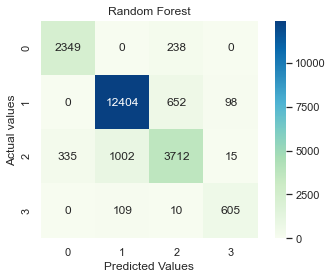

In [141]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('Random Forest')

#

In [142]:
from sklearn.metrics import classification_report
print('Random Forest')
print(classification_report(y_test, y_pred))

Random Forest
              precision    recall  f1-score   support

        High       0.88      0.91      0.89      2587
         Low       0.92      0.94      0.93     13154
      Medium       0.80      0.73      0.77      5064
    Very Low       0.84      0.84      0.84       724

    accuracy                           0.89     21529
   macro avg       0.86      0.85      0.86     21529
weighted avg       0.88      0.89      0.88     21529



In [143]:
from sklearn.metrics import roc_auc_score
y_prob = clf.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.969912 (macro),
0.967999 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.968583 (macro),
0.963054 (weighted by prevalence)


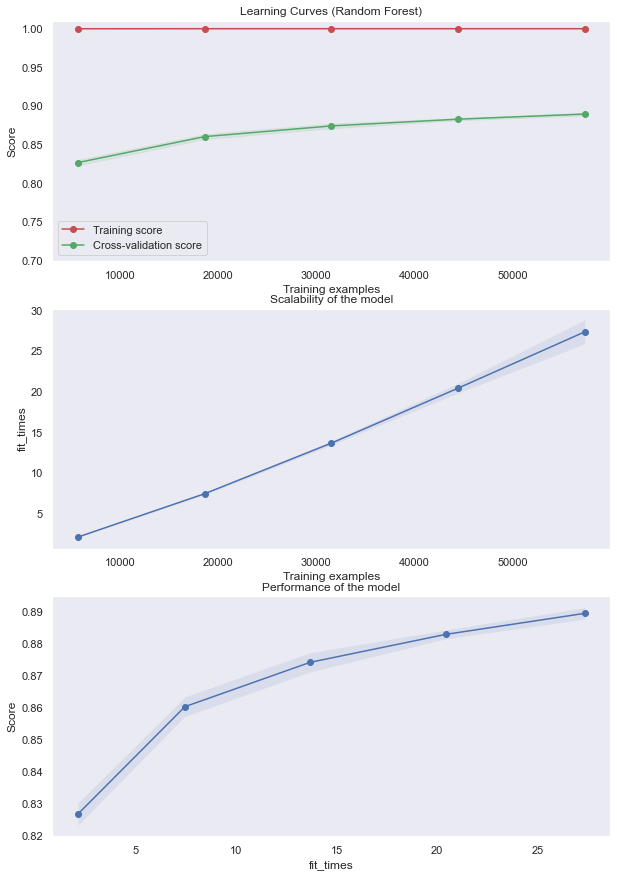

In [144]:
 #from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, x, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Random Forest)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, x, y,axes=axes[:,], cv=cv, ylim=(0.7, 1.01), n_jobs=4)

plt.show()

#

#